## Estimation: Bias and Verification of Standard Errors

Methods/Functions

`mean`, `var`, `RandomState`, `RandomState.chisquare`, `array`, `DataFrame.plot.kde`, `stats.norm.ppf`

### Exercise 25
Simulate a set of i.i.d. $\chi_{5}^{2}$ random variables and use the method of moments
to estimate the mean and variance.

In [67]:
import numpy as np

rs = np.random.RandomState(1)

rvs = rs.chisquare(5, size = 10000)

mu_rvs = rvs.mean()
var_rvs = rvs.var()

print(f"The mean is {mu_rvs} and the variance is {var_rvs}")

The mean is 4.995259543436627 and the variance is 10.03068479742885


### Exercise 26
Compute the asymptotic variance of the method of moment estimator.

In [68]:
err = rvs - mu_rvs
mom_err = np.array([err, err**2 - var_rvs]).T
nobs = mom_err.shape[0] 

acov = mom_err.T @ mom_err / nobs
print(f"The asymptomatic covariance is")
print(acov)
mom_err

The asymptomatic covariance is
[[ 10.0306848   40.00387712]
 [ 40.00387712 440.59485097]]


array([[ 6.09469336, 27.1146024 ],
       [-2.22491247, -5.0804493 ],
       [-2.03825955, -5.8761828 ],
       ...,
       [-1.81566168, -6.73405745],
       [-3.36998954,  1.32614471],
       [-2.63965881, -3.06288614]])

### Exercise 27
Repeat Exercises 24 and 25 a total of 1000 times.
Examine the finite sample bias of these estimators relative to the true values.

In [69]:
estimates = np.zeros((1000,2))
acovs = np.zeros((1000,2,2))
for i in range(1000):
    rvs = rs.chisquare(5,size=10000)
    rvs_mu = rvs.mean()
    rvs_var = rvs.var()
    estimates[i] = [rvs_mu, rvs_var]


    errs = rvs - rvs_mu
    mom_errs = np.array([errs,errs**2 - rvs_var]).T
    nobs = mom_errs.shape[0]

    acovs[i] = mom_errs.T @ mom_errs / nobs

bias = estimates.mean(axis=0) - np.array([5,10])
print(f"The bias of the mean is {bias[0]} and the bias of the variance is {bias[1]}")
# mean is pretty good - variance we systematically underestimate the variance
# biasted by a factor of n/n-1, called the Bessel's correction

The bias of the mean is 0.002950339026609683 and the bias of the variance is 0.013084026319312159


In [70]:
# Bessel correction term
var_unbiased = (estimates[:,1]*10000/9999).mean()
var_unbiased - 10    # comparing to our chi squared expected variance of 10
# We can see that our sample variance estimator is no longer systematically underestimated
# this is an estimate of the variance of our estimator for the population variance, not the underlying variance of the data

0.014085434862794344

### Exercise 28
Repeat Exercises 24 and 25 a total of 1000 times.
Compare the covariance of the estimated means and variance (1000 of each) to the asymptotic covariance of the parameters (use the average of the 1000 estimated variance-covariances). Are these close? How does the sample size affect this?

In [74]:
est_errs = estimates - estimates.mean(axis=0)
finite_sample_cov = est_errs.T @ est_errs /1000
avg_acov = acovs.mean(0)

print("The finite sample covariance is:")
print(finite_sample_cov)

print("The average asymptotic covariance of the parameters is:")
print(avg_acov/10000)

# for smaller sample sizes, it would be unadvisable to use the asymptotic covariance to estimates the finite sample covariance
# much much closer for larger samples - bias is a finite sample property

The finite sample covariance is:
[[0.00096321 0.00411976]
 [0.00411976 0.04713016]]
The average asymptotic covariance of the parameters is:
[[0.00100131 0.00401124]
 [0.00401124 0.04422288]]


### Exercise 29
In the previous problem, for each parameter, form a standardized parameter estimate as

$$z_{i}=\frac{\sqrt{n}\left(\hat{\theta}_{i}-\theta_{i,0}\right)}{\sqrt{\hat{\Sigma}_{ii}}}$$ 

where

$$\sqrt{n}\left(\hat{\theta}-\theta_{0}\right)\stackrel{d}{\rightarrow} N\left(0,\Sigma\right)$$

so that $\hat{\Sigma}$ is the estimated asymptotic covariance. What percent of these $z_{i}$
are larger in absolute value than 10%, 5% and 1% 2-sided critical values from a normal?

In [79]:
from scipy import stats
import pandas as pd

z = np.zeros((1000,2))
for i in range (1000):
    err = estimates[i] - np.array([5,10])
    acov = acovs[i]
    avar = np.diag(acov)
    z[i] = (np.sqrt(10000)*err)/ np.sqrt(avar)

results = {}
abs_z = np.abs(z)
for quantile in [.01,.05,.1]:
    cutoff = stats.norm.ppf(1-quantile/2)
    above = abs_z > cutoff
    results[quantile] = above.mean(0)
results
pd.DataFrame(results, index=["mean","var"])

,0.01,0.05,0.10
mean,0.005,0.050,0.092
var,0.016,0.062,0.112


### Exercise 30
Produce a density plot of the $z_{i}$ standardized parameters and compare to a standard normal.

(0.0, 0.45)

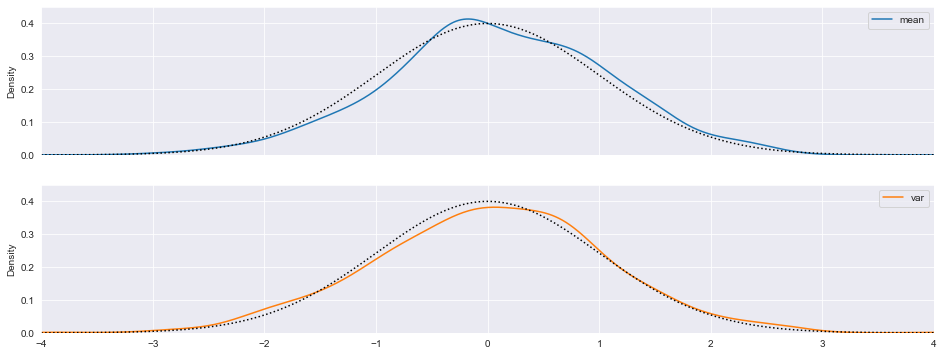

In [80]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc("figure", figsize=(16,6))
sns.set_style("darkgrid")
z = pd.DataFrame(z, columns=['mean', 'var'])

x = np.linspace(-4,4,201)
pdf = stats.norm.pdf(x)

ax = z.plot.kde(subplots=True)
ax[0].set_xlim(-4,4)
ax[0].plot(x, pdf, color="black", linestyle=":")
ax[0].set_ylim(0,0.45)

ax[1].set_xlim(-4,4)
ax[1].plot(x, pdf, color="black", linestyle=":")
ax[1].set_ylim(0,0.45)

### Exercise 31
Repeat the same exercise for the Bernoulli problem from the previous question.

In [81]:
rs = np.random.RandomState(19991231)
sample_size = 25
p = 0.25

population_values = np.array([p, p*(1-p)])
estimates = np.zeros((1000, 2))
acovs = np.zeros((1000,2,2))
for i in range(1000):
    rvs = 1.0 * (rs.random_sample(size=sample_size) <= p) 
    
    mu = rvs.mean()
    var =  rvs.var()
    estimates[i] = [mu, var]

    err = rvs - mu
    mom_errs = np.array([err, err**2 - rvs.var()]).T
    nobs = mom_errs.shape[0]
    
    acovs[i] = mom_errs.T @ mom_errs / nobs

bias = estimates.mean(axis=0) - population_values
print(f"The biases are {bias}")


The biases are [-0.00356  -0.008892]


In [82]:
z = np.zeros((1000, 2))
for i in range(1000):
    err = estimates[i] - population_values
    acov = acovs[i]
    avars = np.diag(acov)
    z[i] = (np.sqrt(sample_size) * err) / np.sqrt(avars) 

z.flat[~np.isfinite(z.flat)] = np.nan

results = {}
abs_z = np.abs(z)
for quantile in [.01, .05, .1]:
    cutoff = stats.norm.ppf(1 - quantile/2)
    above = abs_z > cutoff
    results[quantile] = above.mean(0)
pd.DataFrame(results, index=["mean", "var"])



,0.01,0.05,0.10
mean,0.038,0.095,0.117
var,0.067,0.099,0.154


(0.0, 0.45)

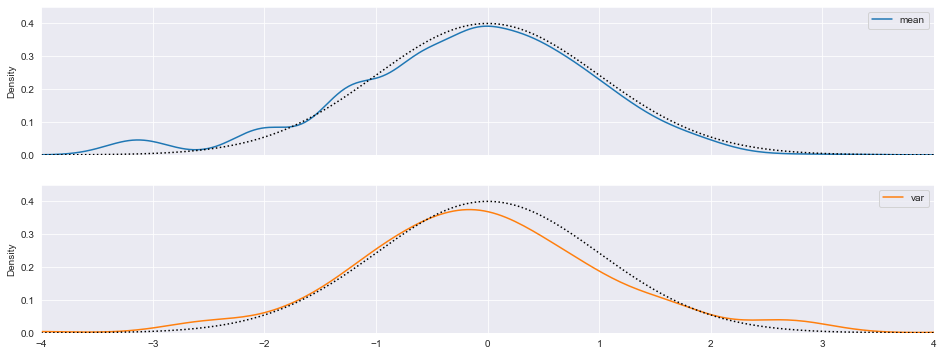

In [83]:
z = pd.DataFrame(z, columns=['mean', 'var'])

plt.rc("figure", figsize=(16,6))
ax = z.plot.kde(subplots=True)
ax[0].set_xlim(-4,4)
ax[0].plot(x, pdf, color="black", linestyle=":")
ax[0].set_ylim(0,0.45)

ax[1].set_xlim(-4,4)
ax[1].plot(x, pdf, color="black", linestyle=":")
ax[1].set_ylim(0,0.45)
